# Project Prototype 

In [2]:
import pandas as pd
Mortality = pd.read_csv("Mortality Both Sexes.csv")
MortalityF = pd.read_csv("Mortality Female.csv")
MortalityM = pd.read_csv("Mortality Male.csv")
Alcohol = pd.read_csv("WHOAlcoholTotalPerCapita_2021-09-20v2.csv")

#new things
Mortality = Mortality[Mortality['Period']>=2000]
Mortality = Mortality[Mortality['Period']<=2016]
Mortality = Mortality.drop(columns = 'DateModified', axis= '1')


Alcohol = Alcohol[Alcohol['Year']>=2000]
Alcohol = Alcohol[Alcohol['Year']<=2016]
Alcohol = Alcohol.drop(columns = {'WHO Region Code',
                                  'Country Code','Alcohol total per capita (15+) consumption in liters (string)'},
                       axis= '1')



#more cleanup!!!!
import seaborn as sns


Mortality = Mortality[Mortality['Location']!= 'South Sudan']
Mortality = Mortality[Mortality['Location']!= 'Sudan']

Alcohol = Alcohol[Alcohol['Country']!='Cook Islands']
Alcohol = Alcohol[Alcohol['Country']!='Dominica']
Alcohol = Alcohol[Alcohol['Country']!='Nauru']
Alcohol = Alcohol[Alcohol['Country']!='Niue']
Alcohol = Alcohol[Alcohol['Country']!='Saint Kitts and Nevis']
Alcohol = Alcohol[Alcohol['Country']!='Surinam']
Alcohol = Alcohol[Alcohol['Country']!='Tuvalu']
Alcohol = Alcohol[Alcohol['Country']!='Andorra']

### Question 1


In [3]:
Mortality.head()

,Unnamed: 0,ParentLocation,Location,Period,Sex,Adult mortality rate
0,0,Americas,Barbados,2016,Both sexes,100.4
1,1,Europe,Serbia,2016,Both sexes,102.5
2,2,Europe,Turkey,2016,Both sexes,104.0
3,3,Europe,Slovakia,2016,Both sexes,104.1
4,4,Western Pacific,Samoa,2016,Both sexes,110.4


### Question 2

In [4]:
Alcohol.head()

,WHO Region,Country,Year,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
1692,Eastern Mediterranean,Kuwait,2016,Both sexes,0.0,0.0,0.0
1693,Eastern Mediterranean,Kuwait,2016,Female,0.0,0.0,0.0
1694,Eastern Mediterranean,Kuwait,2016,Male,0.0,0.0,0.0
1695,Africa,Mauritania,2016,Both sexes,0.0,0.0,0.0
1696,Africa,Mauritania,2016,Female,0.0,0.0,0.0


In [31]:
# YearAlcohol = Alcohol.groupby("Year")["Alcohol total per capita (15+) consumption in liters (numeric)"].mean()

# YearAlcohol

byYearMortality = Mortality.groupby('Period').mean()

byYearMortality = byYearMortality.rename_axis('Period').reset_index()


byYearMortality

YearAlcohol = Alcohol.groupby("Year").mean()

YearAlcohol = YearAlcohol.rename_axis("Year").reset_index()



YearAlcohol

complete_df = pd.merge(YearAlcohol, byYearMortality, left_on = ['Year'],right_on = ['Period'])

complete_df = complete_df.drop(columns=['Alcohol total per capita (15+) consumption in liters (low estimation)',
                                        'Alcohol total per capita (15+) consumption in liters (high estimation)',
                                        'Unnamed: 0',
                                        'Period'
                                       ])
complete_df

,Year,Alcohol total per capita (15+) consumption in liters (numeric),Adult mortality rate
0,2000,5.858540,219.176630
1,2001,5.858540,216.817569
2,2002,5.835976,215.948453
3,2003,5.817453,214.913536
4,2004,5.848881,212.267845
5,2005,5.909400,208.489337
6,2006,5.986886,203.597790
7,2007,6.096549,197.977624
8,2008,6.023707,192.474475
9,2009,5.943344,186.281492


### Question 3


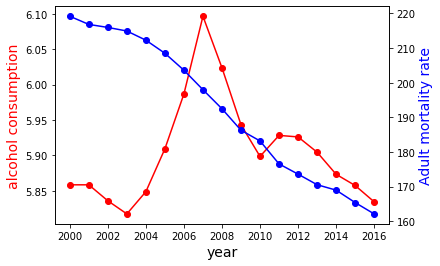

In [33]:
#Akira's part


import matplotlib.pyplot as plt
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(complete_df["Year"], complete_df["Alcohol total per capita (15+) consumption in liters (numeric)"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("alcohol consumption",color="red",fontsize=14)


ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(complete_df["Year"], complete_df["Adult mortality rate"], color="blue",marker="o")
ax2.set_ylabel("Adult mortality rate",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')




In [34]:
#take the max alcohol consumption and min consumption and see if there is any trend
YearAlcoholMax = Alcohol.groupby("Year").max()
YearAlcoholMin = Alcohol.groupby("Year").min()


# YearAlcohol = YearAlcohol.rename_axis("Year").reset_index()

YearAlcoholMax = YearAlcoholMax.rename_axis("Year").reset_index()
YearAlcoholMin = YearAlcoholMin.rename_axis("Year").reset_index()

YearAlcoholMax


,Year,WHO Region,Country,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
0,2000,Western Pacific,Zimbabwe,Male,29.89,25.97,34.49
1,2001,Western Pacific,Zimbabwe,Male,29.89,25.97,34.49
2,2002,Western Pacific,Zimbabwe,Male,31.44,27.49,36.02
3,2003,Western Pacific,Zimbabwe,Male,30.49,26.73,35.29
4,2004,Western Pacific,Zimbabwe,Male,27.60,24.31,33.26
5,2005,Western Pacific,Zimbabwe,Male,27.86,24.43,33.14
6,2006,Western Pacific,Zimbabwe,Male,28.29,24.93,33.30
7,2007,Western Pacific,Zimbabwe,Male,28.48,24.76,33.45
8,2008,Western Pacific,Zimbabwe,Male,27.85,24.27,32.75
9,2009,Western Pacific,Zimbabwe,Male,26.87,23.39,31.54


### Question 4

In [ ]:
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope
from bokeh.io import output_notebook
output_notebook()
bokeh_width, bokeh_height = 800, 600

#separate these in different cells

from bokeh.io import show
from bokeh.plotting import gmap
from bokeh.models import GMapOptions
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256 as palette

p = figure(width=600, height=400)

p.yaxis.axis_label = "Mortaltity"
p.xaxis.axis_label = "Year"


x = sorted_df_latency["dis"]
y = sorted_df_latency["latency_avg"]
model = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
slope = model.coef_[0]
intercept = model.intercept_
regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

# p.add_layout(regression_line)
p.circle(x="dis", y="latency_avg", size=10, hover_color="red", source=sorted_df_latency)

# p.circle(x, y, fill_color="white", size=8)
show(p)